In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from semantic_segmentation_tile import *
from classic_segmentation import ImageDivider
from ipywidgets import interact
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,16)

Load pretrained models

In [ ]:
segment = SegmentationTilePredictor("models", "segmentation_resnet18_10_sept_2020.pkl", (233, 205), scale=2)

In [ ]:
#load trained model
classify = load_learner("models", "Classification_resnet18_10_sept_2020.pkl")

Function for making predictions

In [ ]:
def predict(img_path):
    pred_mask, img = segment.predict_mask(img_path)
    imgs = ImageDivider.from_fastai(img, pred_mask, clean_mask=True).images()
    preds = pd.DataFrame([classify.predict(Image(pil2tensor(img / 255, np.float32))) for img in imgs], columns=['fruit', 'label', 'p'])
    p = preds.p.apply(max).mean()
    fruit = preds.fruit.mode()
    print(f"the selected image contains {len(imgs)} of {fruit} correctly classified with a probability of {round(p*100, 1)}%")
    fig, axes = plt.subplots(1,2)
    img.show(ax=axes[0], title="original image")
    pred_mask.show(ax=axes[1], title='predicted mask')
    

In [ ]:
interact(predict, img_path=get_image_files("dataset_segmentation/images"))

interactive(children=(Dropdown(description='img_path', options=(PosixPath('dataset_segmentation/images/Banana4…

<function __main__.predict(img_path)>

# Segmentation

In [ ]:
img_path = Path("dataset_segmentation/images/Apricot1.png")

In [ ]:
# pred_mask, img = predictor.predict_mask("Image0000.tiff")

In [ ]:
pred_mask, img = segment.predict_mask("dataset_segmentation/images/Apricot1.png")

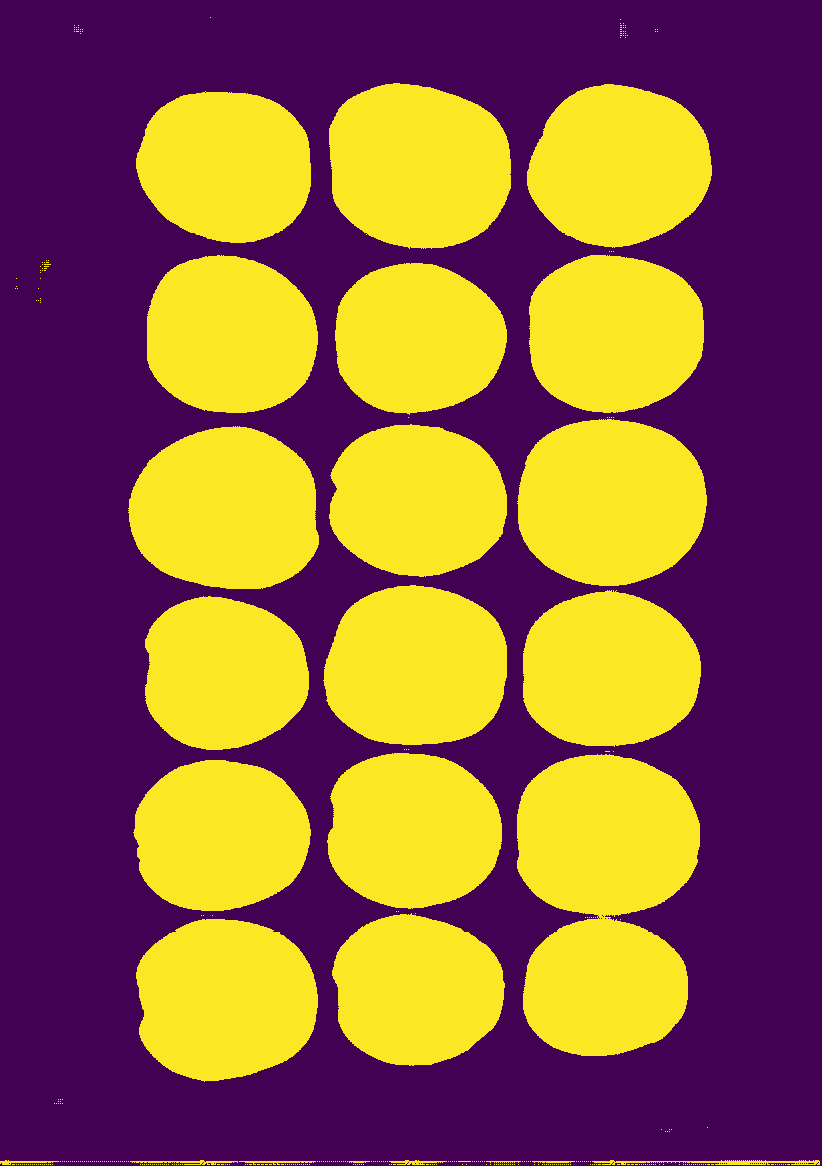

In [ ]:
pred_mask

# Classification

In [ ]:
imgs = ImageDivider.from_fastai(img, pred_mask, clean_mask=True).images()

In [ ]:
len(imgs)

17

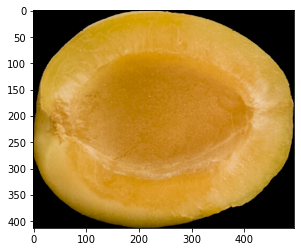

In [ ]:
plt.imshow(imgs[0])

In [ ]:
preds = pd.DataFrame([learn_class.predict(Image(pil2tensor(img / 255, np.float32))) for img in imgs], columns=['fruit', 'label', 'p'])

preds.p.apply(max).mean()

preds.fruit.mode()

In [ ]:
str(max(set(preds), key=preds.count))

'Apricot'

In [ ]:
type(preds[0])

fastai.core.Category

In [ ]:
learn_class

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: dataset_classification/models;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: dataset_classification/models;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

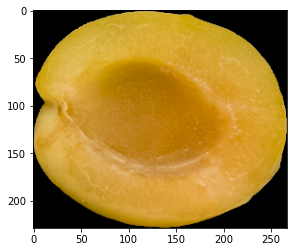

In [ ]:
plt.imshow(imgs[10])

In [ ]:
preds.count?

Signature: preds.count(value, /)
Docstring: Return number of occurrences of value.
Type:      builtin_function_or_method


In [ ]:
# split in individual images

In [ ]:
# get classification results